# Algorithms and infrastructure for accurate pre-processing and analysis of single-cell RNA-seq
## Melsted *, <u>Booeshaghi</u> *, Liu, Gao, Min, Beltrame, Lu, Hjorleifsson, Gehring, Pachter

This notebook demonstrates the use of the kallisto and bustools programs for pre-processing single-cell RNA-seq data. It is based on methods and data described in the following publications:
* Bray, N. L., Pimentel, H., Melsted, P. & Pachter, L. Near-optimal probabilistic RNA-seq quantification. Nat. Biotechnol. 34, 525–527 (2016).
* Wolf, F. A., Angerer, P. & Theis, F. J. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol. 19, 15 (2018).
* Melsted, P., Ntranos, V. & Pachter, L. The Barcode, UMI, Set format and BUStools. Bioinformatics (2019). doi:10.1093/bioinformatics/btz279
* Melsted, P., Booeshaghi, A.S. et al. Modular and efficient pre-processing of single-cell RNA-seq. BioRxiv (2019). doi:10.1101/673285
* Packer, J., Zhu, Q. et al. A lineage-resolved molecular atlas of C. elegans embryogenesis at single-cell resolution. Science (2019). doi:10.1126/science.aax1971

In [0]:
!date

Thu Nov  7 15:00:12 UTC 2019


## Install `kb` (includes kallisto and bustools)

Install `kb` for running the kallisto|bustools workflow

In [0]:
!time pip install kb-python==0.24.1


real	0m3.246s
user	0m2.187s
sys	0m0.194s


In [0]:
!time wget -O idx.idx https://caltech.box.com/shared/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx
!time wget -O t2g.txt https://caltech.box.com/shared/static/cflxji16171skf3syzm8scoxkcvbl97x.txt

--2019-11-07 15:00:20--  https://caltech.box.com/shared/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx
Resolving caltech.box.com (caltech.box.com)... 103.116.4.197
Connecting to caltech.box.com (caltech.box.com)|103.116.4.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx [following]
--2019-11-07 15:00:20--  https://caltech.box.com/public/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx
Reusing existing connection to caltech.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://caltech.app.box.com/public/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx [following]
--2019-11-07 15:00:20--  https://caltech.app.box.com/public/static/82yv415pkbdixhzi55qac1htiaph9ng4.idx
Resolving caltech.app.box.com (caltech.app.box.com)... 103.116.4.199
Connecting to caltech.app.box.com (caltech.app.box.com)|103.116.4.199|:443... connected.
HTTP request sent, awaiting response... 302 F

### Run kb

In [0]:
import time
start = time.time()

In [0]:
!date

Thu Nov  7 15:01:13 UTC 2019


In [0]:
!time kb count -i idx.idx -g t2g.txt --overwrite -t 2 -x 10xv2 https://caltech.box.com/shared/static/fh81mkceb8ydwma3tlrqfgq22z4kc4nt.gz https://caltech.box.com/shared/static/ycxkluj5my7g3wiwhyq3vhv71mw5gmj5.gz

[2019-11-07 15:01:16,484]    INFO Piping https://caltech.box.com/shared/static/fh81mkceb8ydwma3tlrqfgq22z4kc4nt.gz to tmp/fh81mkceb8ydwma3tlrqfgq22z4kc4nt.gz
[2019-11-07 15:01:16,486]    INFO Piping https://caltech.box.com/shared/static/ycxkluj5my7g3wiwhyq3vhv71mw5gmj5.gz to tmp/ycxkluj5my7g3wiwhyq3vhv71mw5gmj5.gz
[2019-11-07 15:01:16,487]    INFO Generating BUS file from
[2019-11-07 15:01:16,487]    INFO         tmp/fh81mkceb8ydwma3tlrqfgq22z4kc4nt.gz
[2019-11-07 15:01:16,487]    INFO         tmp/ycxkluj5my7g3wiwhyq3vhv71mw5gmj5.gz
[2019-11-07 15:01:36,423]    INFO Sorting BUS file ./output.bus to tmp/output.s.bus
[2019-11-07 15:01:39,170]    INFO Whitelist not provided
[2019-11-07 15:01:39,170]    INFO Copying pre-packaged 10XV2 whitelist to .
[2019-11-07 15:01:39,285]    INFO Inspecting BUS file tmp/output.s.bus
[2019-11-07 15:01:39,792]    INFO Correcting BUS records in tmp/output.s.bus to tmp/output.s.c.bus with whitelist ./10xv2_whitelist.txt
[2019-11-07 15:01:56,751]    INFO Sor

## Perform basic analysis with ScanPy 

*   Based on the Jupyter notebook from [kallistobus.tools/getting_started](https://www.kallistobus.tools/getting_started) 

In [0]:
from scipy.io import mmread
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import csr_matrix
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [0]:
mtx = mmread("/content/counts_unfiltered/cells_x_genes.mtx")

In [0]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(mtx)
X = tsvd.transform(mtx)

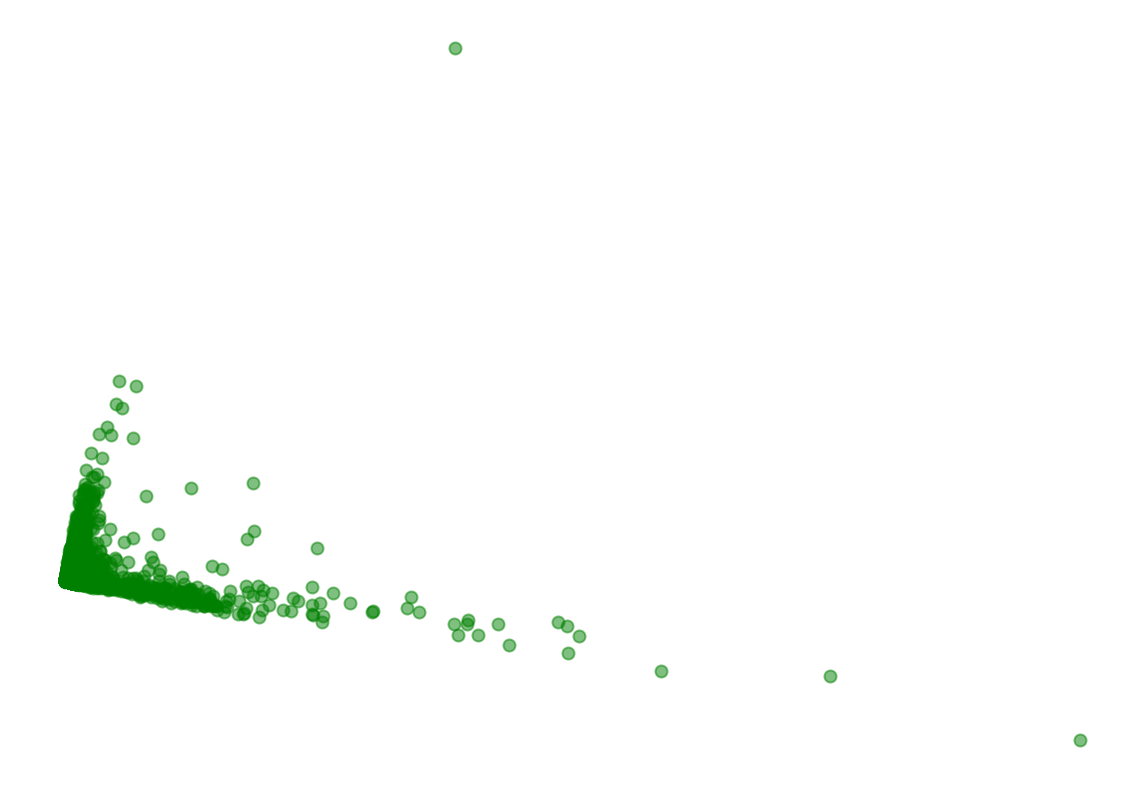

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X[:,0], X[:,1], alpha=0.5, c="green")

plt.axis('off')
plt.show()

In [0]:
mtx = csr_matrix(mtx)

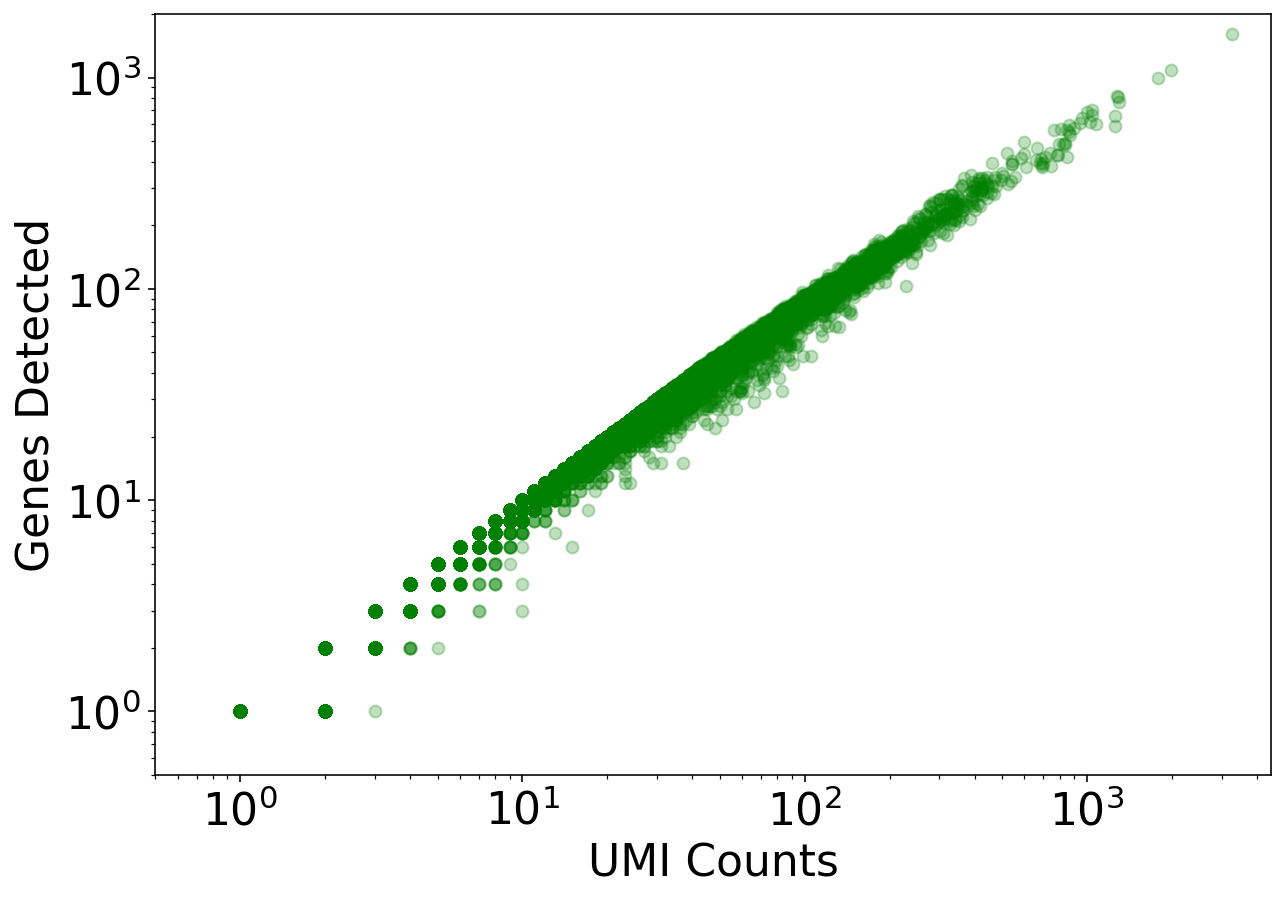

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(np.asarray(mtx.sum(axis=1))[:,0], np.asarray(np.sum(mtx>0, axis=1))[:,0], color="green", alpha=0.25)
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")
ax.set_xscale('log')
ax.set_yscale('log', nonposy='clip')

ax.set_xlim((0.5, 4500))
ax.set_ylim((0.5,2000))


plt.show()

In [0]:
!date

Thu Nov  7 15:02:08 UTC 2019


In [0]:
print(time.time()-start, "seconds")

58.15773034095764 seconds
